- ✅ Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- ✅ Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- ✅ Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- ✅ Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- ✅ При обучении использовать **подбор гиперпараметров**.
- ✅ Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- ✅ * (**+3 балла**) Также снизить размерность данных с помощью метода главных компонент **PCA** и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- ✅ * (**+2 балла**) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.

Датасет: Sonar, Mines vs. Rocks.
Краткое описание: Это набор данных, использованный Гормоном и Сейновски в их исследовании классификации гидроакустических сигналов с использованием нейронной сети.  Задача состоит в том, чтобы обучить сеть различать сигналы гидролокатора, отражающиеся от металлического цилиндра, и сигналы, отражающиеся от камня грубой цилиндрической формы.

Каждый шаблон представляет собой набор из 60 чисел в диапазоне от 0,0 до 1,0. Каждое число представляет энергию в определенном диапазоне частот, интегрированную за определенный период времени.  Апертура интегрирования для более высоких частот возникает позже, поскольку эти частоты передаются позже во время чирп-сигнала.

Метка, связанная с каждой записью, содержит букву "R", если объект представляет собой камень, и "M", если это мина (металлический цилиндр). Цифры в метках расположены в порядке возрастания угла обзора, но они не кодируют угол напрямую.

In [25]:
%pip install scikit-learn
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!wget https://github.com/milaan9/Clustering-Datasets/raw/refs/heads/master/01.%20UCI/sonar.csv

--2025-03-20 20:57:06--  https://github.com/milaan9/Clustering-Datasets/raw/refs/heads/master/01.%20UCI/sonar.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/milaan9/Clustering-Datasets/refs/heads/master/01.%20UCI/sonar.csv [following]
--2025-03-20 20:57:07--  https://raw.githubusercontent.com/milaan9/Clustering-Datasets/refs/heads/master/01.%20UCI/sonar.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86653 (85K) [text/plain]
Saving to: ‘sonar.csv.7’

sonar.csv.7         100%[===================>]  84.62K  --.-KB/s    in 0.1s    

2025-03-20 20:57:07 (665 KB/s) - ‘sonar.csv.7’ saved [866

In [3]:
import pandas
FILE_NAME = "sonar.csv"
df = pandas.read_csv(FILE_NAME)
TARGET_COLUMN = "Class"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

Пропусков в данных нет, признаков 60.

In [5]:
df.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,1.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,1.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,1.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,2.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,2.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,2.000000


Для K-means и DBSCAN полезно будет нормализовать данные, т.к. они чувствительны к масштабу признаков. Воспользуемся min-max normalization.

In [6]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
def normalize_min_max(X):
    features = X.columns.values.tolist()
    for feature in features:
        column = X[feature]
        min_of_column = column.min()
        normalized = (column - min_of_column) / (column.max() - min_of_column)
        X[feature] = normalized

normalize_min_max(X)
X.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.204011,0.162180,0.139068,0.114342,0.173732,0.253615,0.320472,0.285114,0.252485,0.281652,...,0.160047,0.180031,0.265172,0.290669,0.197061,0.200555,0.213642,0.175035,0.216015,0.136425
std,0.169550,0.141277,0.126242,0.110623,0.140888,0.158843,0.167175,0.187767,0.175311,0.192215,...,0.119607,0.137432,0.183385,0.213474,0.160717,0.147080,0.164361,0.148051,0.170286,0.116190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087389,0.067938,0.057326,0.044163,0.079508,0.152714,0.209957,0.165215,0.132571,0.142964,...,0.083914,0.092368,0.118831,0.127924,0.080499,0.102564,0.096591,0.075515,0.098485,0.057737
50%,0.157080,0.129447,0.107753,0.090942,0.141517,0.220236,0.280438,0.235061,0.214349,0.244673,...,0.138446,0.151213,0.235065,0.242690,0.156463,0.165385,0.160511,0.125858,0.173554,0.108545
75%,0.251106,0.202958,0.185447,0.139563,0.237319,0.333042,0.407738,0.361852,0.334555,0.368082,...,0.207420,0.227175,0.374026,0.394737,0.260771,0.260897,0.287642,0.229977,0.281680,0.183025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from matplotlib import pyplot as plt

Воспользуемся уменьшением размерности.

           0
0   0.248622
1   0.430582
2   0.518168
3   0.583294
4   0.631500
5   0.673176
6   0.708124
7   0.738856
8   0.765625
9   0.787412
10  0.803973
11  0.819741
12  0.834398
13  0.848129
14  0.859523
15  0.870521
16  0.880526
17  0.889812
18  0.898361
19  0.906440
20  0.914101
21  0.920791
22  0.927238
23  0.933560
24  0.939648
25  0.945251
26  0.949929
27  0.954519
28  0.958638
29  0.962648
30  0.966219
31  0.969375
32  0.972286
33  0.975123
34  0.977600
35  0.980049
36  0.982281
37  0.984101
38  0.985705
39  0.987258
40  0.988722
41  0.990032
42  0.991285
43  0.992297
44  0.993252
45  0.994067
46  0.994810
47  0.995512
48  0.996148
49  0.996705
50  0.997213
51  0.997653
52  0.998065
53  0.998432
54  0.998779
55  0.999096
56  0.999376
57  0.999624
58  0.999846
59  1.000000


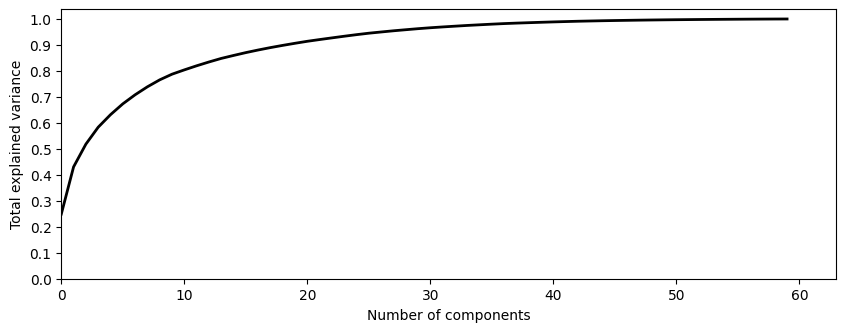

In [8]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(X)
print(pandas.DataFrame(np.cumsum(pca.explained_variance_ratio_)))
plt.figure(figsize=(10, 3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="k", lw=2)
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()


Для обучения далее будем использовать 
1. 60 признаков
2. 20 признаков (90% variance) 
3. 2 признака (43% variance).
После PCA нормализуем данные с min max scaling.

In [9]:
cols = X.columns.values.tolist()
ns_components = [2, 20, 60]
XS = []
for n_components in ns_components:
    pca = PCA(n_components=n_components)
    X_centered = X - X.mean(axis=0)
    pca.fit(X_centered)
    X_n = pca.transform(X_centered)
    X_n = pandas.DataFrame(X_n, columns=cols[:n_components])
    normalize_min_max(X_n)
    XS.append(X_n)
X_2, X_20, X_60 = XS

Найдем оптимальное число кластеров (должно быть 2).

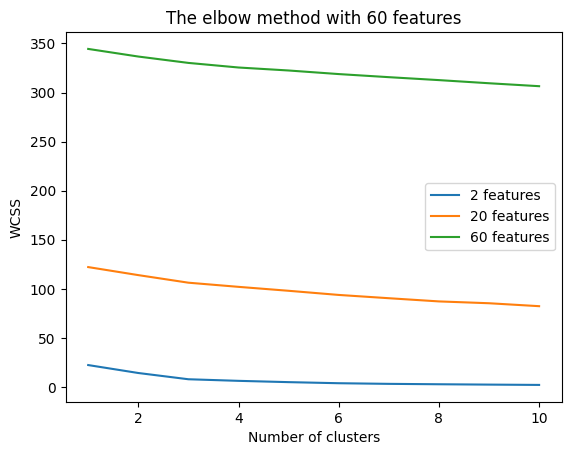

In [10]:
from sklearn.cluster import KMeans

XS = {2: X_2, 20: X_20, 60: X_60}
for n_of_features, X in XS.items():
    wcss = []

    for i in range(1, 11):
        kmeans = KMeans(
            n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0
        )
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss, label=f"{n_of_features} features")
    plt.title(f"The elbow method with {n_of_features} features")
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS")  # within cluster sum of squares
plt.legend()
plt.show()


Elbow method не дает однозначного ответа, подсчитаем The Silhouette Coefficient

In [11]:
from sklearn.metrics import silhouette_score
from statistics import mean
from time import perf_counter

range_n_clusters = [2, 3, 4, 5, 6, 7]


def eval_kmeans(kmeans):
    start_total = perf_counter()
    for n_of_features, X_n in XS.items():
        print(f"features: {n_of_features}")
        evaluation_time = []
        for n_clusters in range_n_clusters:
            start = perf_counter()
            clusterer = kmeans(
                n_clusters=n_clusters, max_iter=300, n_init=10, random_state=0
            )
            clusterer.fit(X_n)
            cluster_labels = clusterer.predict(X_n)
            end = perf_counter()
            evaluation_time.append(end - start)
            optimal_silhouette_avg = silhouette_score(X_n, cluster_labels)
            print(
                "For n_clusters =",
                n_clusters,
                "The average silhouette_score is :",
                optimal_silhouette_avg,
            )
        print(f"Mean evaluation time with {n_of_features=}: {mean(evaluation_time)}")
    end_total = perf_counter()
    print(f"Total time: {end_total - start_total}")

In [12]:
from scipy.spatial.distance import cdist, euclidean


class MyKMeans:
    _CLUSTER_COLUMN_NAME = "cluster"

    def __init__(self, n_clusters: int, max_iter: int, n_init: int, random_state: int):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.n_init = n_init
        self.random_state = random_state

    def fit(self, X):
        X = np.asarray(X)
        random_state = np.random.RandomState(self.random_state)

        
        def init_centroids():
            centroids = [X[random_state.choice(X.shape[0])]]
            for _ in range(1, self.n_clusters):
                distances = np.array([min([euclidean(x, c) for c in centroids]) for x in X])
                probs = distances / distances.sum()
                cumprobs = probs.cumsum()
                r = random_state.rand()
                new_centroid = X[np.searchsorted(cumprobs, r)]
                centroids.append(new_centroid)
            return np.array(centroids)

        optimal_centroids = None
        optimal_silhouette_avg = float("-inf")
        for _ in range(self.n_init):
            centroids = init_centroids()
            row_to_centroid = np.zeros(X.shape[0], dtype=np.int32)

            for _ in range(self.max_iter):
                distances = cdist(X, centroids, 'euclidean')
                row_to_centroid = np.argmin(distances, axis=1)
                
                new_centroids = np.array([X[row_to_centroid == i].mean(axis=0) 
                                        for i in range(self.n_clusters)])
                if np.allclose(centroids, new_centroids, atol=1e-4):
                    break
                centroids = new_centroids

            predicted = row_to_centroid
            current_silhouette_avg = silhouette_score(X, predicted)
            if current_silhouette_avg > optimal_silhouette_avg:
                optimal_centroids = centroids.copy()
                optimal_silhouette_avg = current_silhouette_avg

        self.centroids = optimal_centroids

    def predict(self, X):
        X = np.asarray(X)
        distances = cdist(X, self.centroids, "euclidean")
        return np.argmin(distances, axis=1)


In [13]:
from sklearn.cluster import KMeans

print("KMeans res")
eval_kmeans(KMeans)
print("-----------")
print("MyKMeans res")
eval_kmeans(MyKMeans)
print("-----------")

KMeans res
features: 2
For n_clusters = 2 The average silhouette_score is : 0.3576992856827426
For n_clusters = 3 The average silhouette_score is : 0.42877056878741204
For n_clusters = 4 The average silhouette_score is : 0.37572197019321674
For n_clusters = 5 The average silhouette_score is : 0.3837022875951707
For n_clusters = 6 The average silhouette_score is : 0.4053297394433221
For n_clusters = 7 The average silhouette_score is : 0.38377878432149826
Mean evaluation time with n_of_features=2: 0.02628929383323945
features: 20
For n_clusters = 2 The average silhouette_score is : 0.06887277238515213
For n_clusters = 3 The average silhouette_score is : 0.07285736135554863
For n_clusters = 4 The average silhouette_score is : 0.07779269492731967
For n_clusters = 5 The average silhouette_score is : 0.08565577288279153
For n_clusters = 6 The average silhouette_score is : 0.07056140841260793
For n_clusters = 7 The average silhouette_score is : 0.08459042137274447
Mean evaluation time with n_

Итак, с учетом The Silhouette Coefficient, оптимальное число кластеров = 3 для всех признаков (хотя в исходных данных их 2). Без сжатия признаков модель за 3 кластера, хотя это плохо описывает нашу модель, с 20 признаками за 2 кластера, но с 2 признаками снова за 3, что говорит о том, что мы теряем важную информацию при сжатии. 

Собственная реализация K-Means сошлась на 3 кластерах с 2 и 60 признаками, на 2 -- с 20 признаками. Вероятно, то, что результаты не совпадают с scipy.KMeans, связано с тем, что реализация scipy использует random_state по-другому. В некоторых случаях результаты совпадают, в некоторых MyKMeans слегка лучше, но медленнее (для 20 и 60 признаков  на 60% и для 2-х признаков в 6 раз).

Разница во времени порядка 2х с большим количеством признаков (20, 60) и 6х (с 2 признаками).

Визуализация работы MyKMeans и KMeans.

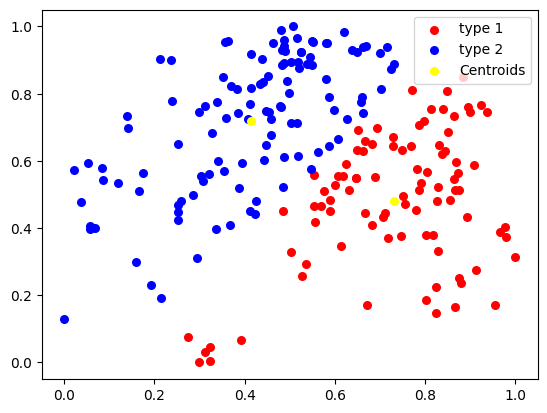

In [14]:
X_2p = pandas.DataFrame(X_2)
clusterer = KMeans(n_clusters=2, max_iter=300, n_init=10, random_state=0)
new_X = X_2p[X_2p.columns[:2]]
attr_1 = X_2p.columns[0]
attr_2 = X_2p.columns[1]
cluster_labels = clusterer.fit_predict(new_X)

plt.scatter(
    X_2p[cluster_labels == 0][attr_1],
    X_2p[cluster_labels == 0][attr_2],
    s=30,
    c="red",
    label="type 1",
)
plt.scatter(
    X_2p[cluster_labels == 1][attr_1],
    X_2p[cluster_labels == 1][attr_2],
    s=30,
    c="blue",
    label="type 2",
)

centroids = clusterer.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=30,
    c="yellow",
    label="Centroids",
)

plt.legend()
plt.show()


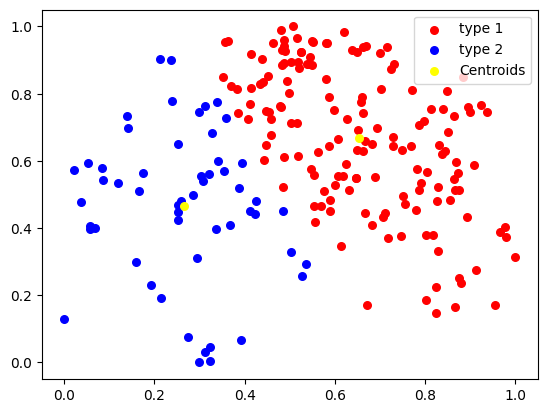

In [15]:
clusterer = MyKMeans(n_clusters=2, max_iter=300, n_init=100, random_state=0)
clusterer.fit(new_X)
cluster_labels = clusterer.predict(new_X)

plt.scatter(
    X_2p[cluster_labels == 0][attr_1],
    X_2p[cluster_labels == 0][attr_2],
    s=30,
    c="red",
    label="type 1",
)
plt.scatter(
    X_2p[cluster_labels == 1][attr_1],
    X_2p[cluster_labels == 1][attr_2],
    s=30,
    c="blue",
    label="type 2",
)

centroids = clusterer.centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=30,
    c="yellow",
    label="Centroids",
)

plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN, AffinityPropagation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import calinski_harabasz_score
import numpy as np


ap_param_grid = {
    "damping": [0.5, 0.6, 0.7, 0.8, 0.9],
    "max_iter": [200, 300, 400, 500],
    "convergence_iter": [10, 15, 20, 25],
}
dbscan_param_grid = {"eps": np.arange(0.5, 10, 0.5), "min_samples": np.arange(1, 5, 1)}
scores = {
    "silhouette_score": silhouette_score,
    "calinski_harabasz_score": calinski_harabasz_score,
}
models = {
    "AffinityPropagation": (AffinityPropagation, ap_param_grid),
    "DBSCAN": (DBSCAN, dbscan_param_grid),
}


def custom_scorer(scorer):
    def _scorer(estimator, X, **kwargs):
        clusters = estimator.fit_predict(X)
        if len(np.unique(clusters)) < 2:
            return -(10**9)
        return scorer(X, clusters)

    return _scorer


for model_name, (model_, param_grid) in models.items():
    print(model_name)
    for scorer_name, scorer in scores.items():
        print(scorer_name)
        for n_of_features, X_n in XS.items():
            model = model_()
            grid_search = GridSearchCV(
                model,
                param_grid,
                scoring=custom_scorer(scorer),
                verbose=0,
                n_jobs=-1,
            )

            grid_search.fit(X_n)

            best_params = grid_search.best_params_
            best_score = grid_search.best_score_
            print(f"{n_of_features=}, params: {best_params}")
            print(f"{scorer_name}: {best_score}\n\n\n")
        print("-----")
    print("--------------")


AffinityPropagation
silhouette_score
n_of_features=2, params: {'convergence_iter': 10, 'damping': 0.9, 'max_iter': 200}
silhouette_score: 0.4955082253155476



n_of_features=20, params: {'convergence_iter': 10, 'damping': 0.8, 'max_iter': 200}
silhouette_score: 0.20257423277534392





/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


n_of_features=60, params: {'convergence_iter': 15, 'damping': 0.9, 'max_iter': 200}
silhouette_score: 0.09699496233942656



-----
calinski_harabasz_score
n_of_features=2, params: {'convergence_iter': 10, 'damping': 0.8, 'max_iter': 200}
calinski_harabasz_score: 66.98586014664252



n_of_features=20, params: {'convergence_iter': 10, 'damping': 0.5, 'max_iter': 400}
calinski_harabasz_score: 7.269725190501869





/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


n_of_features=60, params: {'convergence_iter': 10, 'damping': 0.5, 'max_iter': 200}
calinski_harabasz_score: 2.395502734231017



-----
--------------
DBSCAN
silhouette_score
n_of_features=2, params: {'eps': np.float64(0.5), 'min_samples': np.int64(1)}
silhouette_score: -1000000000.0



n_of_features=20, params: {'eps': np.float64(0.5), 'min_samples': np.int64(1)}
silhouette_score: 0.11587945481055617





/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_83225/3432501036.py", line 28, in _scorer
  File "/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/metrics/cluster/_unsupervised.py", line 139, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
                   ^^^^^

n_of_features=60, params: {'eps': np.float64(1.5), 'min_samples': np.int64(2)}
silhouette_score: 0.10549749591158901



-----
calinski_harabasz_score
n_of_features=2, params: {'eps': np.float64(0.5), 'min_samples': np.int64(1)}
calinski_harabasz_score: -1000000000.0



n_of_features=20, params: {'eps': np.float64(0.5), 'min_samples': np.int64(1)}
calinski_harabasz_score: 7.14689247078104





/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_83225/3432501036.py", line 28, in _scorer
  File "/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/metrics/cluster/_unsupervised.py", line 373, in calinski_harabasz_score
    check_number_of_labels(n_labels, n_samples)
  File "/root/programming/ml-course/.env/l

n_of_features=60, params: {'eps': np.float64(1.5), 'min_samples': np.int64(2)}
calinski_harabasz_score: 2.0762430254195285



-----
--------------


/root/programming/ml-course/.env/lib/python3.11/site-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [            nan -8.00000000e+08 -1.00000000e+09 -1.00000000e+09
             nan -1.99999999e+08 -1.99999999e+08 -1.99999999e+08
  2.03062200e+00  2.07624303e+00  2.07624303e+00  2.07624303e+00
 -5.99999999e+08 -5.99999999e+08 -5.99999999e+08 -5.99999999e+08
 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09 -1.00000

## Анализ результатов

Для кластеризации выбраны Affinity Propagation и DBSCAN. Оценка производилась с использованием двух метрик: Silhouette Score и Calinski-Harabasz Score.

### Affinity Propagation

*   **Silhouette Score:**
    *   **n_of_features=2:** 0.495 (относительное высокое значение).
    *   **n_of_features=20:** 0.203 (Ухудшение качества кластеризации с ростом размерности).
    *   **n_of_features=60:** 0.097 (Дальнейшее ухудшение, проблемы с высокоразмерными данными).
*   **Calinski-Harabasz Score:**
    *   **n_of_features=2:** 66.986 (относительное высокое значение).
    *   **n_of_features=20:** 7.270 (Значительное снижение, ухудшение кластеризации).
    *   **n_of_features=60:** 2.396 (Крайне низкое значение, плохая кластеризация).
*   **Вывод:** Affinity Propagation хорошо работает на данных с низким количеством признаков, но резко ухудшается с увеличением размерности. Необходимо использовать другие алгоритмы для данных с 20 и 60 признаками.

### DBSCAN

*   **Silhouette Score:**
    *   **n_of_features=2:** 1 кластер, не справился.
    *   **n_of_features=20:** 0.116 (Низкое значение, указывает на плохое качество кластеризации).
    *   **n_of_features=60** слишком много кластеров, не справился.
*   **Calinski-Harabasz Score:**
    *   **n_of_features=2:** 1 кластер, не справился.
    *   **n_of_features=20:** 7.147 (Низкое значение, указывает на плохое качество кластеризации).
    *   **n_of_features=60:** слишком много кластеров, не справился.
*   **Вывод:** DBSCAN показал неудовлетворительные результаты. С 60 признаками алгоритм не смог сформировать кластеры из-за недостатка данных.

# t-SNE

/tmp/ipykernel_83225/3674487185.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("nipy_spectral", 2),


Text(0.5, 1.0, 't-SNE projection')

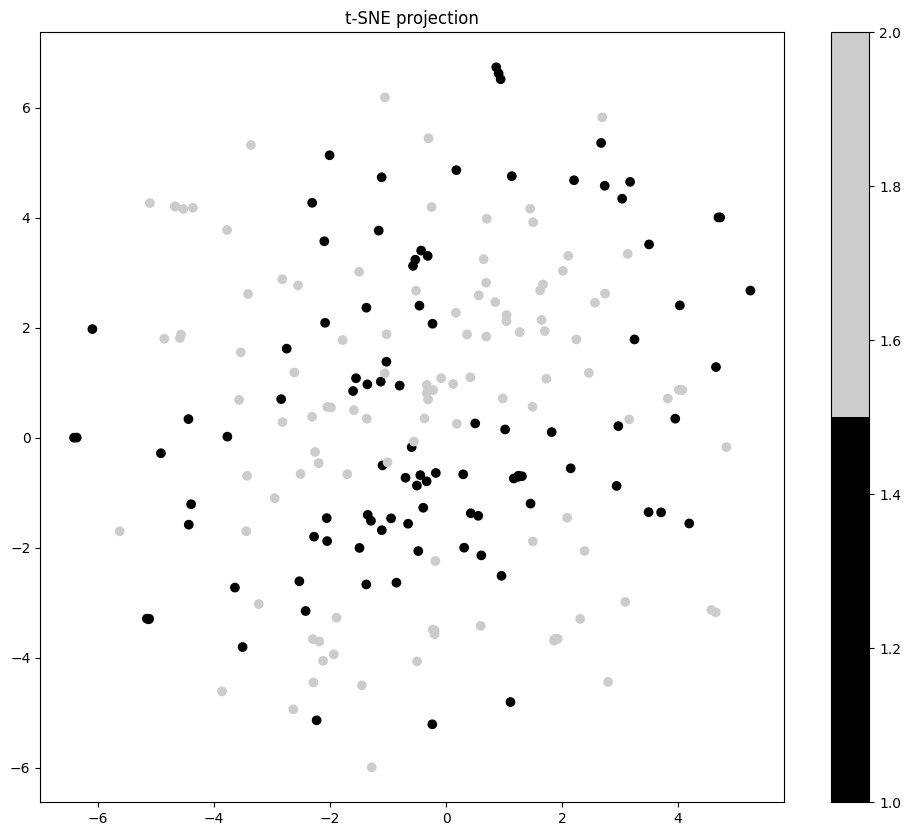

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    cmap=plt.cm.get_cmap("nipy_spectral", 2),
)
plt.colorbar()
plt.title("t-SNE projection")


t-sne также не смог разделить каждый из классов в отдельный кластер, чтобы было понятно, как расположен в пространстве каждый класс. Возможно, для точной классификации предоставленных признаков недостаточно. 